# WeatherPy
----
#### Analysis 
* Analysis 1 
* Analysis 2 
* Analysis 3 
----

#### Note
Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

Helpful Links:
* https://openweathermap.org/current
* https://home.openweathermap.org/api_keys
* https://github.com/crazycapivara/openweathermapy   
* https://github.com/wingchen/citipy/tree/master/citipy

In [104]:
#Check to see if the jupyter notebook is working properly in Github

#https://nbviewer.jupyter.org/

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
import datetime
now = datetime.datetime.now()

# Import API key from python file 
from api_keys import api_key

# api_key = "3555835e8ef2b3d2641f3ddc9a3e0f88"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [105]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# edited the for loop to include .title(), recognized that would match weatherapi better 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
settings = {"units": "imperial", "appid": api_key}

# Print the city count to confirm sufficient count
len(cities)

617

## Perform API Calls

In [114]:
weather_df = pd.DataFrame(columns = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
n=50
data_all = []
cities_chunked = [cities[i * n:(i + 1) * n] for i in range((len(cities) + n - 1) // n )]  
views = {"summary": ["name","clouds.all","sys.country","dt","main.humidity",
                     "coord.lat","coord.lon","main.temp_max","wind.speed"]}
print("\nBeginning Data Retrieval\n-----------------------------\n")
for chunk in cities_chunked:
   for index, city in enumerate(chunk): # for city in chunk
        try: 
            current_weather = owm.get_current(city, **settings)
            data_all.append(current_weather.get_dict(views["summary"]))
            print(f"Processing Record {index+1} of Set {cities_chunked.index(chunk)+1}| {city}")
        except:
            print("City not found. Skipping...")
    # sleep for 60 seconds

time.sleep(60)

print("\n-----------------------------\nData Retrieval Complete\n-----------------------------\n")



Beginning Data Retrieval
-----------------------------

City not found. Skipping...
Processing Record 1 of Set 1| Punta Arenas
Processing Record 2 of Set 1| Cape Town
Processing Record 3 of Set 1| Mataura
Processing Record 4 of Set 1| Severo-Kurilsk
Processing Record 5 of Set 1| Castro
City not found. Skipping...
Processing Record 7 of Set 1| Kodiak
Processing Record 8 of Set 1| Bubaque
Processing Record 9 of Set 1| Bredasdorp
Processing Record 10 of Set 1| Albany
Processing Record 11 of Set 1| Upernavik
Processing Record 12 of Set 1| Bluff
Processing Record 13 of Set 1| Luderitz
Processing Record 14 of Set 1| Namatanai
Processing Record 15 of Set 1| Butaritari
Processing Record 16 of Set 1| Chuy
Processing Record 17 of Set 1| Hilo
Processing Record 18 of Set 1| Qasigiannguit
Processing Record 19 of Set 1| Vardo
Processing Record 20 of Set 1| Busselton
Processing Record 21 of Set 1| Saint George
Processing Record 22 of Set 1| Meulaboh
Processing Record 23 of Set 1| Hamilton
Processing

In [112]:
# checking that length is at least 500
len(data_all)


554

## Export Data to CSV and Convert to DataFrame

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [107]:
#Export Data to CSV
weather_df.to_csv(output_data_file)

# convert to DataFrame
weather_df = pd.DataFrame(data_all)
weather_df = weather_df[["name","clouds.all","sys.country","dt","main.humidity",
                     "coord.lat","coord.lon","main.temp_max","wind.speed"]]
weather_df.columns = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,40,CL,1554225754,50,-53.16,-70.91,55.40,29.97
1,Cape Town,0,ZA,1554226092,49,-33.93,18.42,69.80,11.41
2,Mataura,0,NZ,1554226207,91,-46.19,168.86,44.01,3.49
3,Severo-Kurilsk,88,RU,1554226063,99,50.68,156.12,30.77,18.70
4,Castro,75,CL,1554224400,67,-42.48,-73.76,59.00,8.05


## Latitude vs. Max Temperature Plot

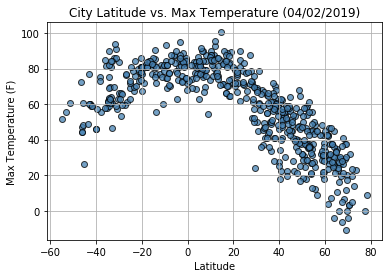

<Figure size 432x288 with 0 Axes>

In [108]:
# X coordinates are the latitude
x_lat = weather_df['Lat']

# Y coordinates are the max temperatures
y_maxtemp = weather_df["Max Temp"]

# Build the scatter plot

plt.scatter(x_lat, y_maxtemp, c = 'steelblue', alpha=0.75, edgecolors ="black", linewidth =1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
today = now.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.grid(True)

# Save Figure
plt.show()

plt.savefig("LatVsTemp_Farah.png")

## Latitude vs. Humidity Plot

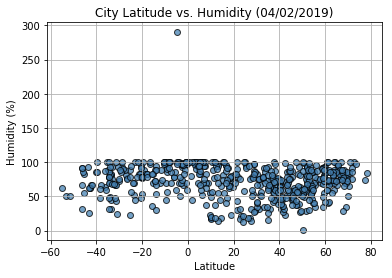

<Figure size 432x288 with 0 Axes>

In [109]:
# X coordinates are the latitude
x_lat = weather_df['Lat']

# Y coordinates are the max temperatures
y_humidity = weather_df["Humidity"]

# Build the scatter plot

plt.scatter(x_lat, y_humidity, c = 'steelblue', alpha=0.75, edgecolors ="black", linewidth =1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
today = now.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.grid(True)

# Save Figure
plt.show()

plt.savefig("LatVsHumidity_Farah.png")

## Latitude vs. Cloudiness Plot

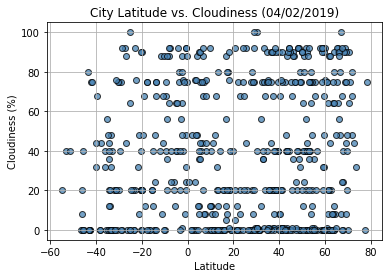

<Figure size 432x288 with 0 Axes>

In [110]:
# X coordinates are the latitude
x_lat = weather_df['Lat']

# Y coordinates are the max temperatures
y_cloud = weather_df["Cloudiness"]

# Build the scatter plot

plt.scatter(x_lat, y_cloud, c = 'steelblue', alpha=0.75, edgecolors ="black", linewidth =1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
today = now.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.grid(True)

# Save Figure
plt.show()

plt.savefig("LatVsCloudiness_Farah.png")

## Latitude vs. Wind Speed Plot

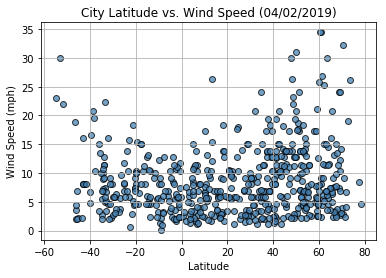

<Figure size 432x288 with 0 Axes>

In [111]:
# X coordinates are the latitude
x_lat = weather_df['Lat']

# Y coordinates are the max temperatures
y_wind = weather_df["Wind Speed"]

# Build the scatter plot

plt.scatter(x_lat, y_wind, c = 'steelblue', alpha=0.75, edgecolors ="black", linewidth =1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
today = now.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.grid(True)

# Save Figure
plt.show()

plt.savefig("LatVsWind_Farah.png")